<a href="https://colab.research.google.com/github/GenAIUnplugged/tensorflow_series/blob/main/cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
import tensorflow_datasets as tfds
# Load the CIFAR-10 dataset
ds = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

In [ ]:
ds

([<_PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
  <_PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>],
 tfds.core.DatasetInfo(
     name='cifar10',
     full_name='cifar10/3.0.2',
     description="""
     The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
     """,
     homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
     data_dir='/root/tensorflow_datasets/cifar10/3.0.2',
     file_format=tfrecord,
     download_size=162.17 MiB,
     dataset_size=132.40 MiB,
     features=FeaturesDict({
         'id': Text(shape=(), dtype=string),
         'image': Image(shape=(32, 32, 3), dtype=uint8),
         'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
     }),
     supervised_keys=('image

In [ ]:
(ds_train,ds_test),ds_info = ds

In [ ]:
type(ds_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir='/root/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Kr

In [ ]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation
BATCH_SIZE = 32
# Define data augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.04), # Approximately 15 degrees
    RandomTranslation(0.1, 0.1, fill_mode='nearest'), # Match width/height shift
    RandomZoom(0.1, 0.1), # Optional: Add zoom if needed
], name="data_augmentation")

# Apply data augmentation to the training dataset *before* batching
# We apply augmentation to each image individually
ds_train = ds_train.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
def preprocess(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  label = tf.one_hot(label, depth=10)
  return image, label

In [ ]:
# Further optimize the datasets
BATCH_SIZE = 32

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Dropout,MaxPooling2D,BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Add dropout after pooling

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout before final dense layers
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(ds_train, epochs=50, validation_data=ds_test)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.2413 - loss: 2.0150 - val_accuracy: 0.4227 - val_loss: 1.6096
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4025 - loss: 1.6350 - val_accuracy: 0.4918 - val_loss: 1.4218
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4543 - loss: 1.5237 - val_accuracy: 0.5295 - val_loss: 1.3085
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4884 - loss: 1.4451 - val_accuracy: 0.5687 - val_loss: 1.1941
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5110 - loss: 1.3897 - val_accuracy: 0.5773 - val_loss: 1.1724
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5291 - loss: 1.3409 - val_accuracy: 0.6049 - val_loss: 1.1086
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5425 - loss: 1.3005 - val_accuracy: 0.6014 - val_loss: 1.1253
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5477 - loss: 1.2811

In [ ]:
loss,acc = model.evaluate(ds_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6812 - loss: 0.9575


In [ ]:
loss,acc

(0.9644328355789185, 0.6815000176429749)

In [ ]:
loss,acc = model.evaluate(ds_test)
loss,acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6812 - loss: 0.9575


(0.9644328355789185, 0.6815000176429749)

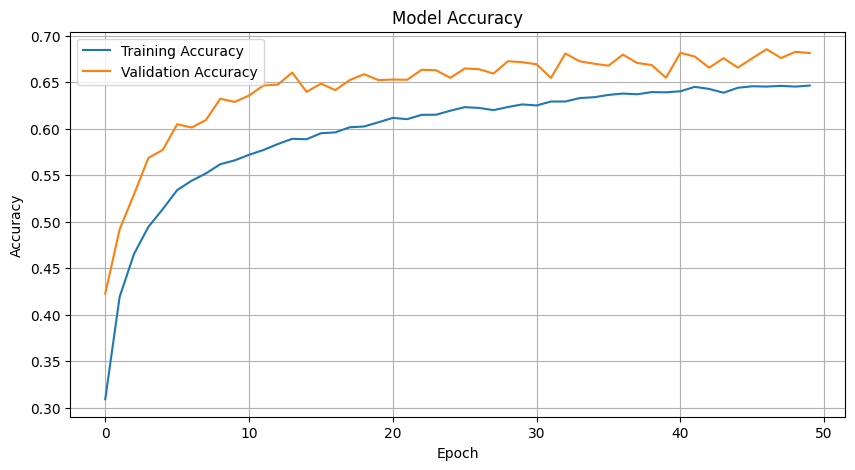

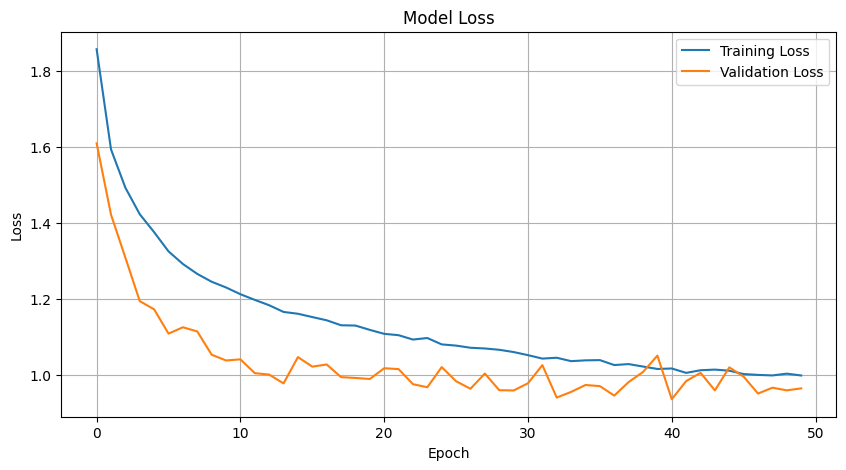

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()